<a href="https://colab.research.google.com/github/TQT2203/BTVN-AI/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
import urllib.request

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [11]:
from google.colab import files
import zipfile
import os

# Tải file ZIP từ máy lên Colab
uploaded = files.upload()  # Chọn file .zip của bạn

# Giải nén file ZIP
for filename in uploaded.keys():
    zip_path = filename
    extract_folder = filename.replace(".zip", "")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

    print(f"✅ Giải nén hoàn tất vào thư mục: {extract_folder}")

# Kiểm tra thư mục đã giải nén
os.listdir(extract_folder)

Saving flower.zip to flower.zip
✅ Giải nén hoàn tất vào thư mục: flower


['train',
 'LICENSE.txt',
 'sample_submission.csv',
 'Testing_set_flower.csv',
 'test']

In [12]:
import zipfile
import os

zip_path = "/content/flower.zip"  # hoặc sửa tên file zip nếu khác
extract_path = "/content/sample_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Giải nén xong!")

✅ Giải nén xong!


In [14]:
data = []
labels = []

classes = ['daisy','dandelion','rose','sunflower','tulip']
img_size = (100, 100)

for i, label in enumerate(classes):
    folder_path = os.path.join("/content/sample_data/train", label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0  #độ phân giải
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(f"Lỗi ảnh: {img_path} - {e}")

data = np.array(data)
labels = to_categorical(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(100, 100, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,848,709 (14.68 MB)

 Trainable params: 3,848,709 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.2687 - loss: 3.7681 - val_accuracy: 0.3873 - val_loss: 1.5196
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.4069 - loss: 1.4531 - val_accuracy: 0.3709 - val_loss: 1.6992
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.4694 - loss: 1.3046 - val_accuracy: 0.4327 - val_loss: 1.3727
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.4852 - loss: 1.2316 - val_accuracy: 0.3982 - val_loss: 1.5517
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5337 - loss: 1.1459 - val_accuracy: 0.4273 - val_loss: 1.5633
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5254 - loss: 1.1913 - val_accuracy: 0.4036 - val_loss: 1.5278
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5460 - loss: 1.1018 - val_accuracy: 0.4055 - val_loss: 1.5055
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.5861 - loss: 1.0416 - val_accuracy: 0.4491 - 

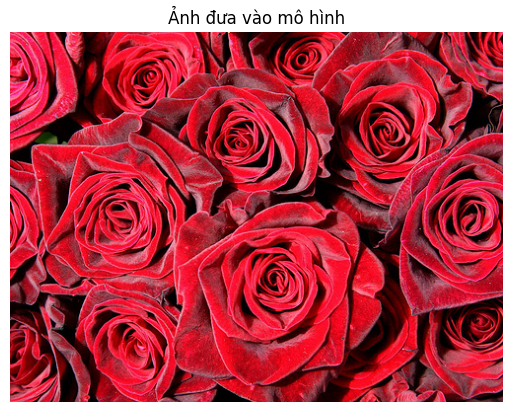

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
✅ Hoa dự đoán: **rose**
🎯 Xác suất: 99.63%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def predict_image(img_path):
    # Hiển thị ảnh
    img_display = load_img(img_path)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title("Ảnh đưa vào mô hình")
    plt.show()

    # Tiền xử lý ảnh cho mô hình
    img = load_img(img_path, target_size=(100, 100))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán
    pred = model.predict(img)
    class_index = np.argmax(pred)
    confidence = np.max(pred)

    # In kết quả
    print(f"✅ Hoa dự đoán: **{classes[class_index]}**")
    print(f"🎯 Xác suất: {confidence * 100:.2f}%")

# 🧪 Ví dụ dùng ảnh hoa hồng
predict_image("/content/3268459296_a7346c6b2c.jpg")

In [ ]:
model.save("hoa.h5")
from google.colab import files
files.download("hoa.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>